In [45]:
import pandas

In [46]:
data_path = 'C:\cxr'

# read data csv

In [47]:
table = pandas.read_csv(data_path + '/train.csv')
table

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
67909,936fd5cff1c058d39817a08f58b72cae,No finding,14,R1,NaN,NaN,NaN,NaN
67910,ca7e72954550eeb610fe22bf0244b7fa,No finding,14,R1,NaN,NaN,NaN,NaN
67911,aa17d5312a0fb4a2939436abca7f9579,No finding,14,R8,NaN,NaN,NaN,NaN
67912,4b56bc6d22b192f075f13231419dfcc8,Cardiomegaly,3,R8,771.0,979.0,1680.0,1311.0


In [48]:
nodule_table = table[table['class_name'] == 'Nodule/Mass']
nodule_table

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
7,47ed17dcb2cbeec15182ed335a8b5a9e,Nodule/Mass,8,R9,557.0,2352.0,675.0,2484.0
40,8e063eadea9a6aeb684c893c8598be3e,Nodule/Mass,8,R10,376.0,1867.0,438.0,1914.0
56,d106ec9b305178f3da060efe3191499a,Nodule/Mass,8,R8,796.0,1078.0,850.0,1129.0
59,f32ab457c492c30221d3a89fe7c6b25a,Nodule/Mass,8,R15,1202.0,1090.0,1590.0,1654.0
66,a3f5ac68c8d1b1805be21f18c47fc186,Nodule/Mass,8,R9,2123.0,922.0,2233.0,1010.0
...,...,...,...,...,...,...,...,...
67717,9943805f08872ab64d994fc84ff1b25d,Nodule/Mass,8,R10,374.0,1085.0,479.0,1204.0
67735,c008cfaf7009c94d297cc2e715e81c03,Nodule/Mass,8,R10,1927.0,948.0,2088.0,1126.0
67834,0162dad8330007f8f0daf43bcf4033f1,Nodule/Mass,8,R10,940.0,543.0,971.0,562.0
67863,88bf02cc510da5050a869c290d8f8565,Nodule/Mass,8,R9,944.0,795.0,1090.0,1002.0


In [52]:
nodule_table[nodule_table['image_id'] == nodule_table.iloc[0, 0]]

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
7,47ed17dcb2cbeec15182ed335a8b5a9e,Nodule/Mass,8,R9,557.0,2352.0,675.0,2484.0
2771,47ed17dcb2cbeec15182ed335a8b5a9e,Nodule/Mass,8,R8,544.0,2345.0,674.0,2485.0
51769,47ed17dcb2cbeec15182ed335a8b5a9e,Nodule/Mass,8,R10,562.0,2346.0,663.0,2460.0


# read dicom

## reference
https://www.kaggle.com/raddar/convert-dicom-to-np-array-the-correct-way

In [5]:
# !pip install pylibjpeg pylibjpeg-libjpeg pylibjpeg-openjpeg

In [6]:
import numpy as np
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

import matplotlib.pyplot as plt
%matplotlib inline


def read_xray(path, voi_lut = True, fix_monochrome = True):
    dicom = pydicom.read_file(path)
    
    # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
        
    return data

In [7]:
data_path + '/train/' + nodule_table.iloc[0][0] + '.dicom'

'C:\\cxr/train/47ed17dcb2cbeec15182ed335a8b5a9e.dicom'

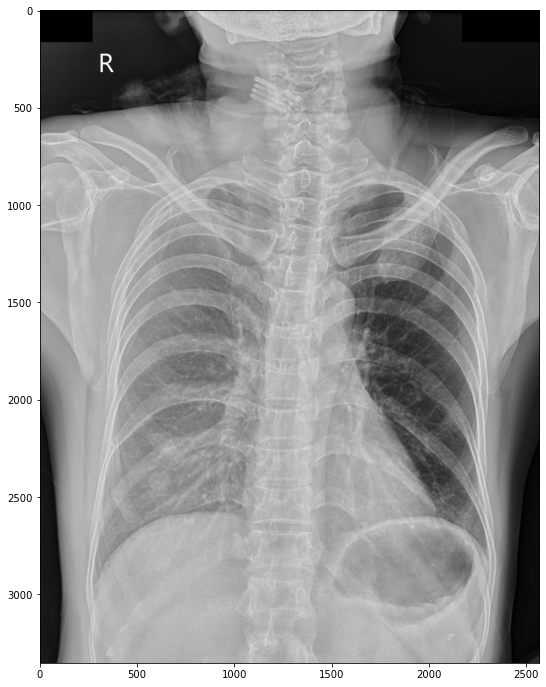

In [8]:
img = read_xray(data_path + '/train/' + nodule_table.iloc[0][0] + '.dicom')
plt.figure(figsize = (12,12))
plt.imshow(img, 'gray')

In [9]:
# check min/max value

print(np.max(img), np.min(img))

255 0


## draw label

In [33]:
import cv2

In [34]:
# coordinate
box = nodule_table.iloc[0][4:8]

# draw setting
thickness = 3
color = (255, 0, 0) 
start_point, end_point = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

image = np.stack([cl1, cl1, cl1], axis = -1)
# draw
img_box = cv2.rectangle(image, start_point, end_point , color, thickness)

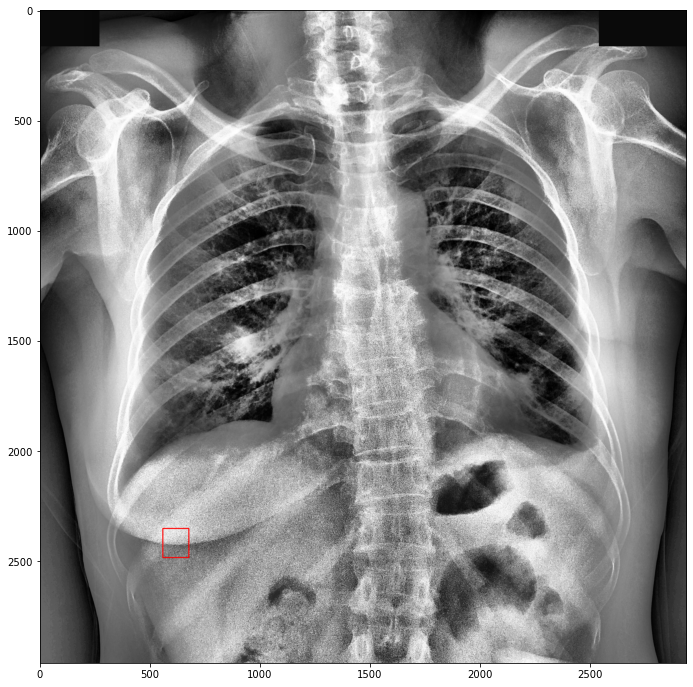

In [35]:
plt.figure(figsize = (12,12))
plt.imshow(img_box)

## create mask label with np

In [53]:
mask = np.zeros_like(img)
mask[start_point[1]:end_point[1], start_point[0]:end_point[0]] = 1

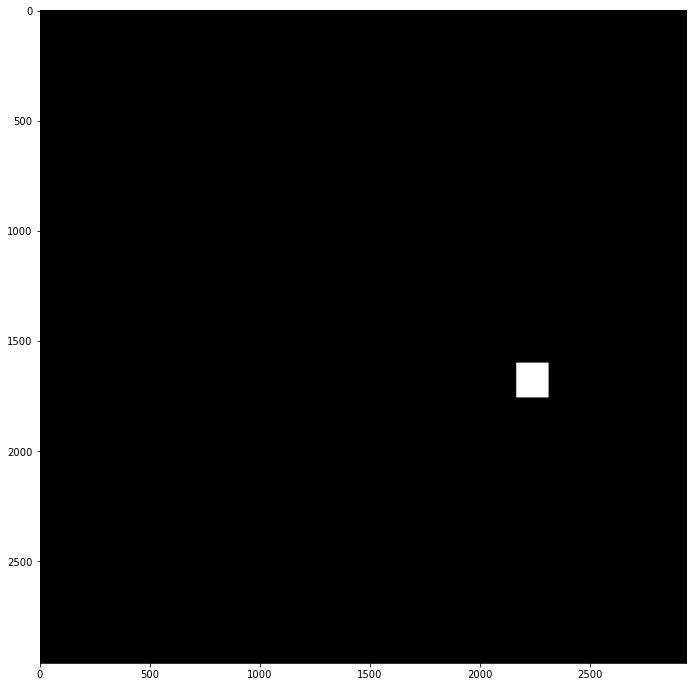

In [54]:
plt.figure(figsize = (12,12))
plt.imshow(mask, 'gray')

In [41]:
cv2.imwrite(mask_path + '/../' + nodule_table.iloc[i][0] + '.png', mask*255)

True

# now create all the mask

In [55]:
mask_path = data_path + '/label/nodule'
img_path = data_path + '/train_png/nodule'

In [56]:
from tqdm import tqdm

In [63]:
proccessed = set()

In [64]:
for i in tqdm(range(len(nodule_table))):
    # read dicom
#     img = read_xray(data_path + '/train/' + nodule_table.iloc[i][0] + '.dicom')
    
#     cv2.imwrite(img_path + '/' + nodule_table.iloc[i][0] + '.png', img)
    
    # read from converted cxr
    img = cv2.imread(img_path + '/' + nodule_table.iloc[i][0] + '.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    if nodule_table.iloc[i][0] not in proccessed:
        proccessed.add(nodule_table.iloc[i][0])
    
    # coordinate
    box = nodule_table.iloc[i][4:8]
    start_point, end_point = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))

    mask = None
    if nodule_table.iloc[i][0] not in proccessed:
        mask = np.zeros_like(img)
    else:
        mask = cv2.imread(mask_path + '/' + nodule_table.iloc[i][0] + '.png', mask)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    
    mask[start_point[1]:end_point[1], start_point[0]:end_point[0]] = 255
    
    cv2.imwrite(mask_path + '/' + nodule_table.iloc[i][0] + '.png', mask)

100%|██████████████████████████████████████████████████████████████████████████████| 2580/2580 [06:40<00:00,  6.45it/s]


In [65]:
proccessed

{'0005e8e3701dfb1dd93d53e2ff537b6e',
 '0061cf6d35e253b6e7f03940592cc35e',
 '008b3176a7248a0a189b5731ac8d2e95',
 '010018c93ed33ae56ed048ee54867e46',
 '011ae9520e81f1efe71c9d954ec07d09',
 '01546d3e6175ceaabd7d92f0c566579d',
 '0162dad8330007f8f0daf43bcf4033f1',
 '01a3c3d994d85ce5634d2d13c03fd4b0',
 '01ee6e560f083255a630c41bba779405',
 '0211f9fe31142ba1e25fb6a2ea3fea38',
 '023a8b8557d1fd59f272c63be6f3d4c0',
 '024f9140bd829c346fc91fcf4009d251',
 '02562eb68a9c682f5f644fa7a099733f',
 '02fe3eea41166a1d3eb75307a12c4a63',
 '033e1637bed9b9f3dccac9c6c419adc2',
 '035480fbf46e946e21e7dce78637c329',
 '03e6ecfa6f6fb33dfeac6ca4f9b459c9',
 '04031e57794b9e8861e3c65e935f11d2',
 '0453de2faeb8d349af739a68d9dee1cb',
 '04aed38b30c4de9461c8a9940e99d811',
 '04d3efc7a608c4d58edb8c1b7f90a708',
 '053cf0f0a75926ebd53f0265bad6aee4',
 '055ea315ae13148aae178aed27fa980d',
 '05721adb43ab7c061733568b274c006b',
 '059ec0fc0d6840cff6e268e46f85faa0',
 '05dfd35f424da60897dfafc2340e0891',
 '0608fb82e9965a0a6f3607f93e304d2a',
 

In [66]:
len(proccessed)

826

# useful image resize function

https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv

In [23]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [24]:
img.shape

(2963, 2936)

In [31]:
img_r = None
if img.shape[0] >= img.shape[1]:
    img_r=image_resize(img, height = 512)
else:
    img_r=image_resize(img, width = 512)

In [32]:
img_r.shape

(512, 507)